# Li-Ion Battery Data

## Import Required Modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Loading Data

In [2]:
df = pd.read_csv('data0505.csv')

In [3]:
df.head()

,SOC,SOH,Power,T,SEI_after,SEI_delta
0,80,1.0,-1.00000,23,1.000000e-08,-0.003660
1,80,1.0,-0.89474,23,1.000000e-08,-0.001314
2,80,1.0,-0.78947,23,1.000000e-08,0.004721
3,80,1.0,-0.68421,23,1.000000e-08,-0.001936
4,80,1.0,-0.57895,23,1.000000e-08,0.003147


**Data Description**

- SOC = State of charge of the battery (0% = empty; 100% = full)
- SOH = State of Health of the battery (It is determined by the thickness of the SEI layer)
- Power = output power (positive sign represets charging; negative sign represents discharging.)
- SEI_delta

In [4]:
# filter dataset
df = df[df["Power"] > 0]
df = df[df["SOC"] > 0]
df = df[df["SOH"] > 0]

In [5]:
df.head()

,SOC,SOH,Power,T,SEI_after,SEI_delta
10,80,1.0,0.052632,23,1.000000e-08,44.877633
11,80,1.0,0.157890,23,1.000000e-08,46.189571
12,80,1.0,0.263160,23,1.000000e-08,47.560540
13,80,1.0,0.368420,23,1.000000e-08,48.999841
14,80,1.0,0.473680,23,1.000001e-08,50.481875


## Exploratory Analysis and Data Visualization

Text(0, 0.5, 'SEI_delta')

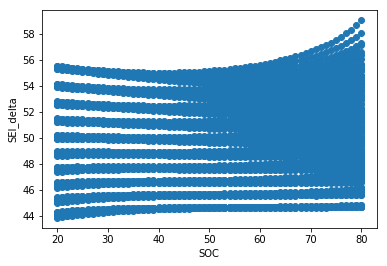

In [6]:
# Effect of SOC on SEI Delta
plt.scatter(df['SOC'],df['SEI_delta'])
plt.xlabel("SOC")
plt.ylabel("SEI_delta")

Text(0, 0.5, 'SEI_delta')

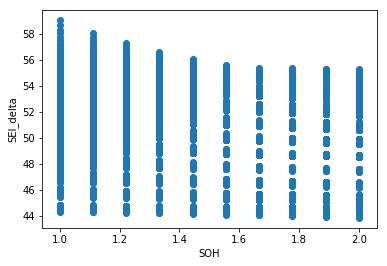

In [7]:
# Effect of SOC on SEI Delta
plt.scatter(df['SOH'],df['SEI_delta'])
plt.xlabel("SOH")
plt.ylabel("SEI_delta")

Text(0, 0.5, 'SEI_delta')

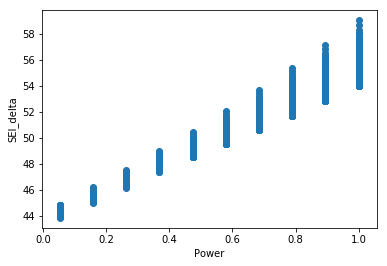

In [8]:
# Effect of SOC on SEI Delta
plt.scatter(df['Power'],df['SEI_delta'])
plt.xlabel("Power")
plt.ylabel("SEI_delta")

Here,
- Power and SEI_data have linear relationship.

In [9]:
df.columns

Index(['SOC', 'SOH', 'Power', 'T', 'SEI_after', 'SEI_delta'], dtype='object')

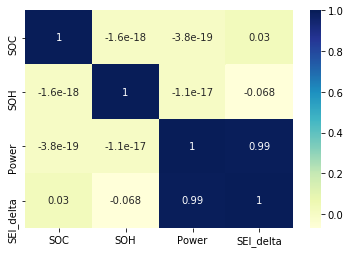

In [12]:
# Heatmap of correlation matrix
cor=df[['SOC', 'SOH', 'Power', 'SEI_delta']].corr()
# Draw Heatmap
sns.heatmap(cor,annot=True,cmap="YlGnBu")
plt.show()

Here,
- Power and SEI_delta has very strong positive correlation ,which indicates increase in Poser also causes increase in SEI_delta and vice-versa.
- Reaminig Correlations are not significant enough.

## Linear Regression Analysis

In [17]:
# import required modules
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_validate
from sklearn import preprocessing

In [18]:
# clean up data
df = df.dropna(how = 'all')
df = df.fillna(0)
df = df.round(4)
df=df[df['Power']>=0]
df=df[df['SOC']>0]
df=df[df['SOH']>0]
df=df[df['SEI_delta']>0]

In [19]:
# Data normalization using minmax scaler
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(df)
df_normalized = pd.DataFrame(np_scaled,columns=df.columns)
df_normalized.head()

C:\Users\Aadmin\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,SOC,SOH,Power,T,SEI_after,SEI_delta
0,1.0,0.0,0.000000,0.0,0.0,0.067068
1,1.0,0.0,0.111146,0.0,0.0,0.153487
2,1.0,0.0,0.222293,0.0,0.0,0.243787
3,1.0,0.0,0.333333,0.0,0.0,0.338592
4,1.0,0.0,0.444480,0.0,0.0,0.436216


In [20]:
from sklearn.model_selection import train_test_split
# Split data into features and label
X = df_normalized[["SOC", "SOH", "Power"]]
y = df_normalized["SEI_delta"]
# Split dataset into 80:20 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [23]:
# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

0.04627653817838612
[ 0.02243901 -0.04618563  0.68645928]


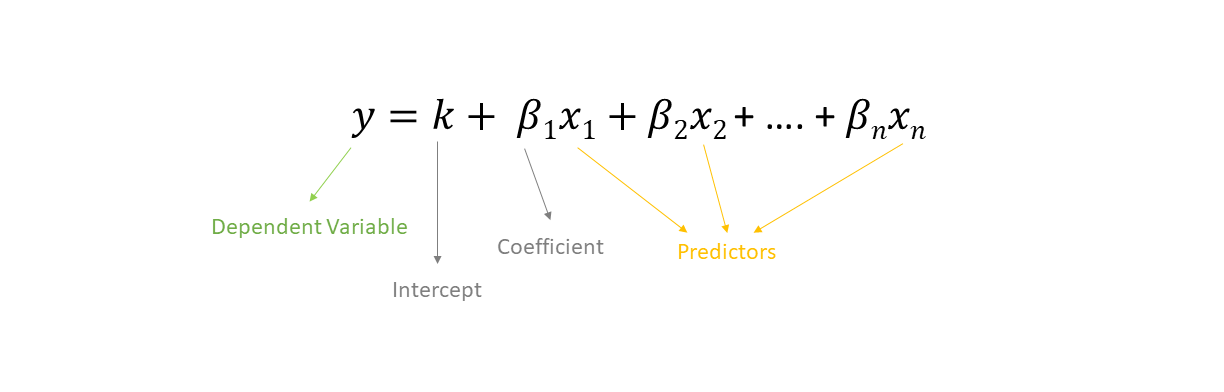

Here,
- Intercept: 0.046
- Coefficient for SOC: 0.02243901 
- Coefficient for SOH:-0.04618563  
- Coefficient for Power:0.68645928

    - Coefficient for Power has higher value because of higher correlation with SEI_delta. 

In [24]:
# Combining coefficient and its value
feature_cols=["SOC", "SOH", "Power"]
# pair the feature names with the coefficients
dict(zip(feature_cols, linreg.coef_))

{'SOC': 0.022439012196647987,
 'SOH': -0.0461856297917454,
 'Power': 0.6864592846113056}

In [26]:
import numpy as np
from sklearn import metrics

# make predictions on the testing set
y_pred = linreg.predict(X_test)

# compute the RMSE of our predictions
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# compute the R Square for model
print("R-Square",metrics.r2_score(y_test, y_pred))

RMSE: 0.022371259616440042
R-Square 0.9897341597465429


- R-square: It is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model. It is a measure of the strength of the linear relation between two variables. R-square value rise between 0-1. The Value of R-Square near 1 considered as good. Here, R-square=.98, then we can say that 98% of variation in dependent variable(y-variable) can be explained by the dependent variable(x-variable).

- The root-mean-squared error (RMSE) is a measure of how well your model performed. It does this by measuring difference between predicted values and the actual values. In other words, we can also say "the average deviation (measured in standard deviations) of our prediction compared to reality."


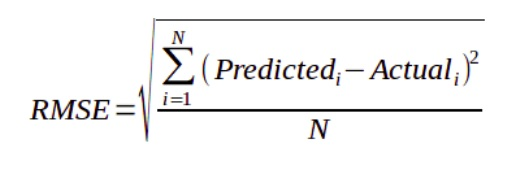

### Apply Other Regresion model

In [29]:
# import required module
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

evaluate=pd.DataFrame(columns=['Algorithm','R-Square','RMSE'])

print("Linear Regression")
# Fit the model and predict the SEI_delta
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
# compute the RMSE of our predictions
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# compute the R Square for model
print("R-Square",metrics.r2_score(y_test, y_pred))
evaluate=evaluate.append({'Algorithm':"Linear Regression",
                          'R-Square':metrics.r2_score(y_test, y_pred),
                          'RMSE':np.sqrt(metrics.mean_squared_error(y_test, y_pred))},ignore_index=True)
print("========================================\n")


print("Support Vector Regressor")
# Fit the model and predict the SEI_delta
svr = SVR()
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)
# compute the RMSE of our predictions
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# compute the R Square for model
print("R-Square",metrics.r2_score(y_test, y_pred))
evaluate=evaluate.append({'Algorithm':"Support Vector Regressor",
                          'R-Square':metrics.r2_score(y_test, y_pred),
                          'RMSE':np.sqrt(metrics.mean_squared_error(y_test, y_pred))},ignore_index=True)

print("========================================\n")

print("Multi-Layer Perceptron Regressor")
# Fit the model and predict the SEI_delta
mlp=MLPRegressor()
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
# compute the RMSE of our predictions
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# compute the R Square for model
print("R-Square",metrics.r2_score(y_test, y_pred))
evaluate=evaluate.append({'Algorithm':"Multi-Layer Perceptron Regressor",
                          'R-Square':metrics.r2_score(y_test, y_pred),
                          'RMSE':np.sqrt(metrics.mean_squared_error(y_test, y_pred))},ignore_index=True)
print("========================================\n")

print("DecisionTreeRegressor")
# Fit the model and predict the SEI_delta
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
y_pred = dtr.predict(X_test)
# compute the RMSE of our predictions
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# compute the R Square for model
print("R-Square",metrics.r2_score(y_test, y_pred))
evaluate=evaluate.append({'Algorithm':"Decision Tree Regressor",
                          'R-Square':metrics.r2_score(y_test, y_pred),
                          'RMSE':np.sqrt(metrics.mean_squared_error(y_test, y_pred))},ignore_index=True)
print("========================================\n")

print("Random Forest Regressor")
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train.values.ravel())
y_pred = rfr.predict(X_test)
# compute the RMSE of our predictions
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# compute the R Square for model
print("R-Square",metrics.r2_score(y_test, y_pred))
evaluate=evaluate.append({'Algorithm':"Random Forest Regressor",
                          'R-Square':metrics.r2_score(y_test, y_pred),
                          'RMSE':np.sqrt(metrics.mean_squared_error(y_test, y_pred))},ignore_index=True)

Linear Regression
RMSE: 0.022371259616440042
R-Square 0.9897341597465429

Support Vector Regressor
RMSE: 0.059102030921600456
R-Square 0.9283496302459328

Multi-Layer Perceptron Regressor


C:\Users\Aadmin\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


RMSE: 0.01757582323258608
R-Square 0.9936635650834174

DecisionTreeRegressor
RMSE: 0.0029133483717880683
R-Square 0.9998259001224049

Random Forest Regressor


C:\Users\Aadmin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RMSE: 0.002748691232341948
R-Square 0.9998450236098642


In [30]:
evaluate

,Algorithm,R-Square,RMSE
0,Linear Regression,0.989734,0.022371
1,Support Vector Regressor,0.928350,0.059102
2,Multi-Layer Perceptron Regressor,0.993664,0.017576
3,Decision Tree Regressor,0.999826,0.002913
4,Random Forest Regressor,0.999845,0.002749


Here, 
- We can see the Random Forest Regressor is the best model because it has highest R-Square and lowest RMSE. 
- All the models are showing strong regression model because R-square of all the models is greater the 0.92.

## Predicting Remaining Life time

In [1]:
# Import Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load Data
data = pd.read_csv('PHM08.csv')

In [3]:
data.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s13,s14,s15,s16,s17,s18,s19,s20,s21,RUL
0,1,1,10.0047,0.2501,20,489.05,604.13,1499.45,1309.95,10.52,...,2388.13,8120.83,8.6216,0.03,368,2319,100.0,28.58,17.1735,222
1,1,2,0.0015,0.0003,100,518.67,642.13,1584.55,1403.96,14.62,...,2388.15,8132.87,8.3907,0.03,391,2388,100.0,38.99,23.3619,221
2,1,3,34.9986,0.8401,60,449.44,555.42,1368.17,1122.49,5.48,...,2387.95,8063.84,9.3557,0.02,334,2223,100.0,14.83,8.8555,220
3,1,4,20.0031,0.7005,0,491.19,607.03,1488.44,1249.18,9.35,...,2388.07,8052.30,9.2231,0.02,364,2324,100.0,24.42,14.7832,219
4,1,5,42.0041,0.8405,40,445.00,549.52,1354.48,1124.32,3.91,...,2387.89,8083.67,9.2986,0.02,330,2212,100.0,10.99,6.4025,218


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45918 entries, 0 to 45917
Data columns (total 27 columns):
id          45918 non-null int64
cycle       45918 non-null int64
setting1    45918 non-null float64
setting2    45918 non-null float64
setting3    45918 non-null int64
s1          45918 non-null float64
s2          45918 non-null float64
s3          45918 non-null float64
s4          45918 non-null float64
s5          45918 non-null float64
s6          45918 non-null float64
s7          45918 non-null float64
s8          45918 non-null float64
s9          45918 non-null float64
s10         45918 non-null float64
s11         45918 non-null float64
s12         45918 non-null float64
s13         45918 non-null float64
s14         45918 non-null float64
s15         45918 non-null float64
s16         45918 non-null float64
s17         45918 non-null int64
s18         45918 non-null int64
s19         45918 non-null float64
s20         45918 non-null float64
s21         45918 non-null

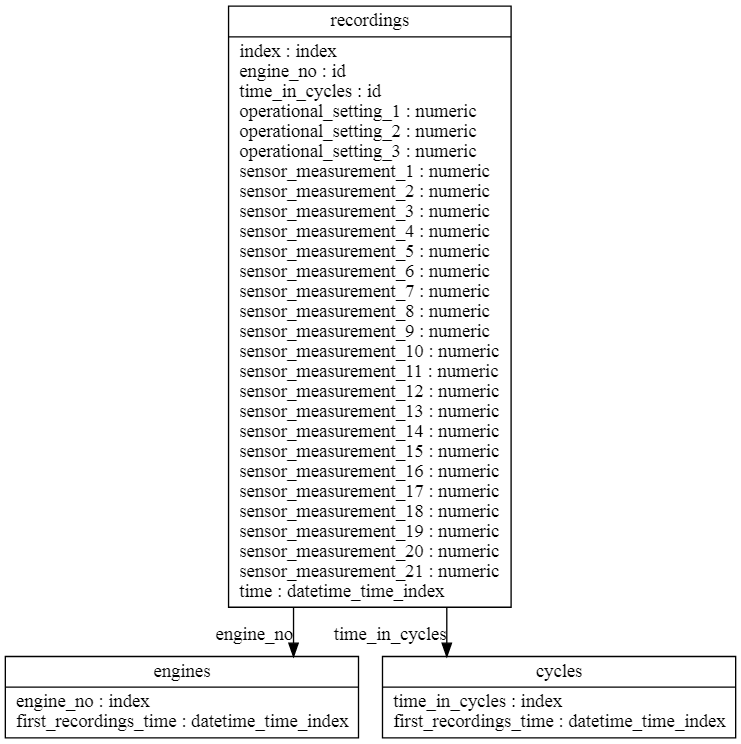

In [5]:
data.columns

Index(['id', 'cycle', 'setting1', 'setting2', 'setting3', 's1', 's2', 's3',
       's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14',
       's15', 's16', 's17', 's18', 's19', 's20', 's21', 'RUL'],
      dtype='object')

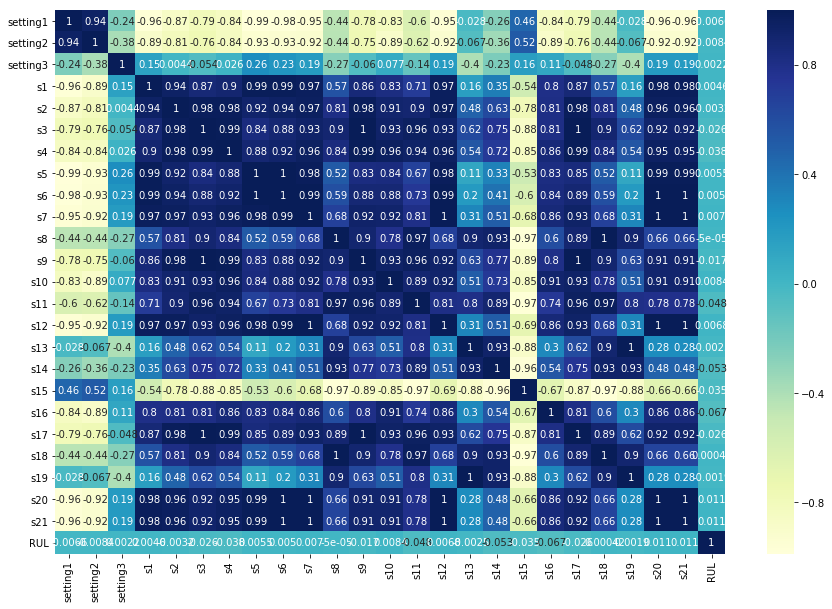

In [6]:
cor=data[['setting1', 'setting2', 'setting3', 's1', 's2', 's3','s4', 
        's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14',
        's15', 's16', 's17', 's18', 's19', 's20', 's21', 'RUL']].corr()
plt.figure(figsize=(15,10))
sns.heatmap(cor,annot=True,cmap="YlGnBu")
plt.show()

Here,
- setting1,setting2 and s15 has high negative correaltion with other variable.
- s13 and s19 has moderate correlation with other variable.
- Reaminig other columns has high positive correlation with other variable.

In [7]:
# clean up data
data = data.dropna(how ='any')

In [8]:
# split data into features and label
X=data[['setting1', 'setting2', 'setting3', 's1', 's2', 's3',
    's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 
    's13', 's14','s15', 's16', 's17', 's18', 's19', 's20', 's21',]]
y=data[['RUL']]

In [9]:
# Data normalization using min-max scaler
from sklearn.preprocessing import MinMaxScaler
col_list=['setting1', 'setting2', 'setting3', 's1', 's2', 's3',
          's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 
          's13', 's14','s15', 's16', 's17', 's18', 's19', 's20', 's21',]
scaler = MinMaxScaler()
X_norm=scaler.fit_transform(X)
X_norm = pd.DataFrame(X_norm,columns=col_list)

C:\Users\Aadmin\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [10]:
from sklearn.model_selection import train_test_split
# split dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
evaluate=pd.DataFrame(columns=['Algorithm','R-Square','RMSE'])

print("Linear Regression")
# Fit the model and predict the SEI_delta
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
# compute the RMSE of our predictions
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# compute the R Square for model
print("R-Square",metrics.r2_score(y_test, y_pred))
evaluate=evaluate.append({'Algorithm':"Linear Regression",
                          'R-Square':metrics.r2_score(y_test, y_pred),
                          'RMSE':np.sqrt(metrics.mean_squared_error(y_test, y_pred))},ignore_index=True)
print("========================================\n")


print("Support Vector Regressor")
# Fit the model and predict the SEI_delta
svr = SVR()
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)
# compute the RMSE of our predictions
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# compute the R Square for model
print("R-Square",metrics.r2_score(y_test, y_pred))
evaluate=evaluate.append({'Algorithm':"Support Vector Regressor",
                          'R-Square':metrics.r2_score(y_test, y_pred),
                          'RMSE':np.sqrt(metrics.mean_squared_error(y_test, y_pred))},ignore_index=True)

print("========================================\n")

print("Multi-Layer Perceptron Regressor")
# Fit the model and predict the SEI_delta
mlp=MLPRegressor()
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
# compute the RMSE of our predictions
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# compute the R Square for model
print("R-Square",metrics.r2_score(y_test, y_pred))
evaluate=evaluate.append({'Algorithm':"Multi-Layer Perceptron Regressor",
                          'R-Square':metrics.r2_score(y_test, y_pred),
                          'RMSE':np.sqrt(metrics.mean_squared_error(y_test, y_pred))},ignore_index=True)
print("========================================\n")

print("DecisionTreeRegressor")
# Fit the model and predict the SEI_delta
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
y_pred = dtr.predict(X_test)
# compute the RMSE of our predictions
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# compute the R Square for model
print("R-Square",metrics.r2_score(y_test, y_pred))
evaluate=evaluate.append({'Algorithm':"Decision Tree Regressor",
                          'R-Square':metrics.r2_score(y_test, y_pred),
                          'RMSE':np.sqrt(metrics.mean_squared_error(y_test, y_pred))},ignore_index=True)
print("========================================\n")

print("Random Forest Regressor")
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train.values.ravel())
y_pred = rfr.predict(X_test)
# compute the RMSE of our predictions
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# compute the R Square for model
print("R-Square",metrics.r2_score(y_test, y_pred))
evaluate=evaluate.append({'Algorithm':"Random Forest Regressor",
                          'R-Square':metrics.r2_score(y_test, y_pred),
                          'RMSE':np.sqrt(metrics.mean_squared_error(y_test, y_pred))},ignore_index=True)

Linear Regression
RMSE: 44.113693687370215
R-Square 0.5840687575375729

Support Vector Regressor


C:\Users\Aadmin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aadmin\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


RMSE: 66.51365459002372
R-Square 0.054424266125739584

Multi-Layer Perceptron Regressor


C:\Users\Aadmin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1316: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aadmin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


RMSE: 43.60253029083084
R-Square 0.5936520418320987

DecisionTreeRegressor
RMSE: 58.76645277072928
R-Square 0.2618686508767001

Random Forest Regressor


C:\Users\Aadmin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RMSE: 42.80373445325302
R-Square 0.6084042054817743


In [12]:
evaluate

,Algorithm,R-Square,RMSE
0,Linear Regression,0.584069,44.113694
1,Support Vector Regressor,0.054424,66.513655
2,Multi-Layer Perceptron Regressor,0.593652,43.602530
3,Decision Tree Regressor,0.261869,58.766453
4,Random Forest Regressor,0.608404,42.803734


Here, 
- We can see the Random Forest Regressor is the best model because it has highest R-Square and lowest RMSE.
- Decision Tree and Support vector are very poor models because of its low R-sqaure value and high RMSE.

### Feature Selection Using Random Forest

Random forests also offers a good feature selection indicator. Scikit-learn provides an extra variable with the model, which shows the relative importance or contribution of each feature in the prediction. It automatically computes the relevance score of each feature in the training phase. Then it scales the relevance down so that the sum of all scores is 1.

This score will help you choose the most important features and drop the least important ones for model building.

Random forest uses gini importance or mean decrease in impurity (MDI) to calculate the importance of each feature. Gini importance is also known as the total decrease in node impurity. This is how much the model fit or accuracy decreases when you drop a variable. The larger the decrease, the more significant the variable is. Here, the mean decrease is a significant parameter for variable selection. The Gini index can describe the overall explanatory power of the variables.

In [13]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train.values.ravel())

feature_importances_ = pd.Series(rfr.feature_importances_,index=col_list).sort_values(ascending=False)
feature_importances_

C:\Users\Aadmin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


s11         2.003259e-01
s13         1.813519e-01
s15         1.782854e-01
s4          7.717468e-02
s9          5.936733e-02
s14         4.800099e-02
s12         3.397377e-02
s2          3.354266e-02
s3          3.115814e-02
s21         2.947981e-02
s7          2.808348e-02
s8          2.620862e-02
s20         2.280112e-02
setting1    2.248577e-02
s17         1.185498e-02
setting2    1.151581e-02
s6          2.613792e-03
setting3    8.911594e-04
s10         4.456951e-04
s16         4.177136e-04
s18         7.520669e-06
s5          6.977746e-06
s1          6.750791e-06
s19         5.335303e-08
dtype: float64

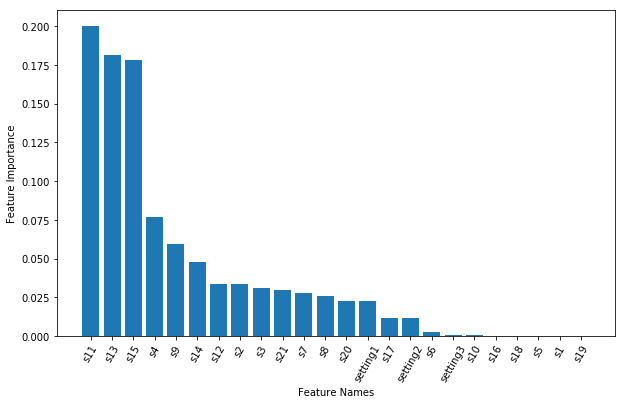

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,6))
plt.bar(feature_importances_.index,feature_importances_)
plt.xlabel('Feature Names')
plt.ylabel('Feature Importance')
plt.xticks(rotation=60)
plt.show()

In [15]:
feature_importances_[:10].index

Index(['s11', 's13', 's15', 's4', 's9', 's14', 's12', 's2', 's3', 's21'], dtype='object')

In [16]:
#Select top features to improve the results
X=data[['s11', 's13', 's15', 's4', 's9', 's14', 's12', 's2', 's3', 's21']]
y=data[['RUL']]

# Normalize Data
from sklearn.preprocessing import MinMaxScaler
col_list=[['s11', 's13', 's15', 's4', 's9', 's14', 's12', 's2', 's3', 's21']]
scaler = MinMaxScaler()
X_norm=scaler.fit_transform(X)
X_norm = pd.DataFrame(X_norm,columns=col_list)

In [17]:
# split data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=42)

In [18]:
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

evaluate=pd.DataFrame(columns=['Algorithm','R-Square','RMSE'])

print("Linear Regression")
# Fit the model and predict the SEI_delta
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
# compute the RMSE of our predictions
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# compute the R Square for model
print("R-Square",metrics.r2_score(y_test, y_pred))
evaluate=evaluate.append({'Algorithm':"Linear Regression",
                          'R-Square':metrics.r2_score(y_test, y_pred),
                          'RMSE':np.sqrt(metrics.mean_squared_error(y_test, y_pred))},ignore_index=True)
print("========================================\n")


print("Support Vector Regressor")
# Fit the model and predict the SEI_delta
svr = SVR()
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)
# compute the RMSE of our predictions
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# compute the R Square for model
print("R-Square",metrics.r2_score(y_test, y_pred))
evaluate=evaluate.append({'Algorithm':"Support Vector Regressor",
                          'R-Square':metrics.r2_score(y_test, y_pred),
                          'RMSE':np.sqrt(metrics.mean_squared_error(y_test, y_pred))},ignore_index=True)

print("========================================\n")

print("Multi-Layer Perceptron Regressor")
# Fit the model and predict the SEI_delta
mlp=MLPRegressor()
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
# compute the RMSE of our predictions
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# compute the R Square for model
print("R-Square",metrics.r2_score(y_test, y_pred))
evaluate=evaluate.append({'Algorithm':"Multi-Layer Perceptron Regressor",
                          'R-Square':metrics.r2_score(y_test, y_pred),
                          'RMSE':np.sqrt(metrics.mean_squared_error(y_test, y_pred))},ignore_index=True)
print("========================================\n")

print("DecisionTreeRegressor")
# Fit the model and predict the SEI_delta
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
y_pred = dtr.predict(X_test)
# compute the RMSE of our predictions
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# compute the R Square for model
print("R-Square",metrics.r2_score(y_test, y_pred))
evaluate=evaluate.append({'Algorithm':"Decision Tree Regressor",
                          'R-Square':metrics.r2_score(y_test, y_pred),
                          'RMSE':np.sqrt(metrics.mean_squared_error(y_test, y_pred))},ignore_index=True)
print("========================================\n")

print("Random Forest Regressor")
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train.values.ravel())
y_pred = rfr.predict(X_test)
# compute the RMSE of our predictions
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# compute the R Square for model
print("R-Square",metrics.r2_score(y_test, y_pred))
evaluate=evaluate.append({'Algorithm':"Random Forest Regressor",
                          'R-Square':metrics.r2_score(y_test, y_pred),
                          'RMSE':np.sqrt(metrics.mean_squared_error(y_test, y_pred))},ignore_index=True)

Linear Regression
RMSE: 46.45997360852015
R-Square 0.5386477803423328

Support Vector Regressor


C:\Users\Aadmin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aadmin\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


RMSE: 66.36090074402712
R-Square 0.058762457182087946

Multi-Layer Perceptron Regressor


C:\Users\Aadmin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1316: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aadmin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


RMSE: 49.00522640071522
R-Square 0.4867139079811552

DecisionTreeRegressor
RMSE: 59.224109112541456
R-Square 0.25032717226694723

Random Forest Regressor


C:\Users\Aadmin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RMSE: 43.463402029573345
R-Square 0.5962410791445689


In [19]:
evaluate

,Algorithm,R-Square,RMSE
0,Linear Regression,0.538648,46.459974
1,Support Vector Regressor,0.058762,66.360901
2,Multi-Layer Perceptron Regressor,0.486714,49.005226
3,Decision Tree Regressor,0.250327,59.224109
4,Random Forest Regressor,0.596241,43.463402


Here, 
- We can see the Random Forest Regressor is the best model because it has highest R-Square and lowest RMSE but there is no improvement in the results after feature selection.
- Decision Tree and Support vector are very poor models because of its low R-sqaure value and high RMSE.

## Links for Algorithm material

https://www.datacamp.com/community/tutorials/decision-tree-classification-python
https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python
https://www.datacamp.com/community/tutorials/naive-bayes-scikit-learn
https://www.datacamp.com/community/tutorials/random-forests-classifier-python
https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python
https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn 